真实参数： [10, 0.34, 0.5235987755982988]
拟合参数： [-10.2286055    0.3368767   -2.66614618]


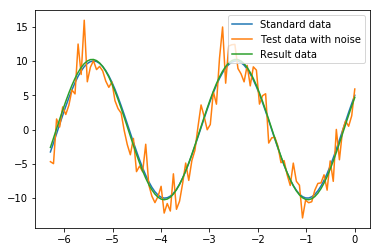

In [5]:
'''
最小二乘拟合
'''
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

def func(x,p):
    '''
    数据拟合所用的函数：A * sin(2 * pi * k * x + theta)
    '''
    A,k,theta = p
    return A * np.sin(2 * np.pi * k * x+theta)

def residuals(p,y,x):
    '''
    实验数据x,y和拟合函数之间的差，p为拟合需要找到的系数
    '''
    return y - func(x,p)

x = np.linspace(0, -2 * np.pi, 100)
A, k, theta = 10, 0.34, np.pi/6 # 真实数据的函数参数
y0 = func(x, [A,k,theta]) # 真实数据
y1 = y0 + 2*np.random.randn(len(x)) # 加入噪声之后的实验数据

p0 = [7, 0.2, 0] # 第一次猜测的函数拟合参数

# 调用leastsq进行数据拟合
# residuals为计算误差的函数
# p0为拟合参数的初始值
# args为需要的拟合的实验数据
plsq = leastsq(residuals, p0, args=(y1,x))

print('真实参数：',[A,k,theta])
print('拟合参数：',plsq[0]) # 实验数据拟合后的参数

plt.plot(x, y0, label = 'Standard data')
plt.plot(x, y1, label = 'Test data with noise')
plt.plot(x, func(x,plsq[0]),label = 'Result data')
plt.legend()
plt.show()